# Support Vector Machine (SVM)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads_Previous.csv to Social_Network_Ads_Previous.csv


In [3]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads_Previous.csv']), delimiter=";")
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
# dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
# Import the train_test_split function from the scikit-learn library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X is the feature matrix, y is the target variable
# test_size = 0.2 indicates that 20% of the data will be used for testing
# random_state = 0 ensures reproducibility by fixing the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
print(X_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [7]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [8]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [9]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


## Feature Scaling

In [10]:
# Import the StandardScaler class from the scikit-learn library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform it
# This scales and centers the features in X_train
X_train = sc.fit_transform(X_train)

# Transform the test data using the same scaler
# This ensures consistency in scaling between training and testing sets
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

In [12]:
print(X_test)

[[-7.98950822e-01  4.94607583e-01]
 [-2.12648508e-02 -5.77359062e-01]
 [-3.12897090e-01  1.46942725e-01]
 [-7.98950822e-01  2.62831011e-01]
 [-3.12897090e-01 -5.77359062e-01]
 [-1.09058306e+00 -1.44652121e+00]
 [-7.01740076e-01 -1.59138156e+00]
 [-2.15686344e-01  2.14601566e+00]
 [-1.96547978e+00 -5.58617754e-02]
 [ 8.53631867e-01 -7.80163563e-01]
 [-7.98950822e-01 -6.06331134e-01]
 [-9.93372315e-01 -4.32498705e-01]
 [-1.18475597e-01 -4.32498705e-01]
 [ 7.59458956e-02  2.04886868e-01]
 [-1.77105829e+00  4.65635512e-01]
 [-6.04529329e-01  1.36376973e+00]
 [-1.18475597e-01  2.04886868e-01]
 [-1.86826903e+00  4.36663440e-01]
 [ 1.63131784e+00  1.74040666e+00]
 [-3.12897090e-01 -1.38857706e+00]
 [-3.12897090e-01 -6.64275277e-01]
 [ 8.53631867e-01  2.14601566e+00]
 [ 2.70367388e-01 -5.48386991e-01]
 [ 8.53631867e-01  1.01610487e+00]
 [-1.47942605e+00 -1.21474464e+00]
 [ 1.04805336e+00  2.05909944e+00]
 [-9.93372315e-01  4.94607583e-01]
 [-8.96161568e-01  2.91803083e-01]
 [-1.18475597e-01 -2

## Training the SVM model on the Training set

In [13]:
# Import the Support Vector Machine (SVM) classifier from scikit-learn
from sklearn.svm import SVC

# Choose the SVM kernel type:

# Linear Kernel:
#classifier = SVC(kernel='linear')

# Radial Basis Function (RBF) Kernel:
classifier = SVC(kernel='rbf')

# Sigmoid Kernel:
#classifier = SVC(kernel='sigmoid')

# Fit the SVM classifier to the training data
classifier.fit(X_train, y_train)

SVC()

In [ ]:
# !!! We will run this section when we want to use the "poly" kernel function.

# Import necessary modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

# Set the degree of the polynomial kernel
degree = 3

# Apply polynomial transformation
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create the SVM classifier with a polynomial kernel
classifier = SVC(kernel='poly', degree=degree)

# Train the classifier using the polynomial-transformed training data
classifier.fit(X_train_poly, y_train)

SVC(kernel='poly')

## Predicting the Test set results

In [14]:
# Use the trained SVM classifier to predict labels for the test data
y_pred = classifier.predict(X_test)

In [ ]:
# !!! We will run this section if the kernel function is used as "poly".
# Use the trained SVM classifier with polynomial kernel to predict labels for the polynomial-transformed test data
y_pred = classifier.predict(X_test_poly)

## Making the Confusion Matrix

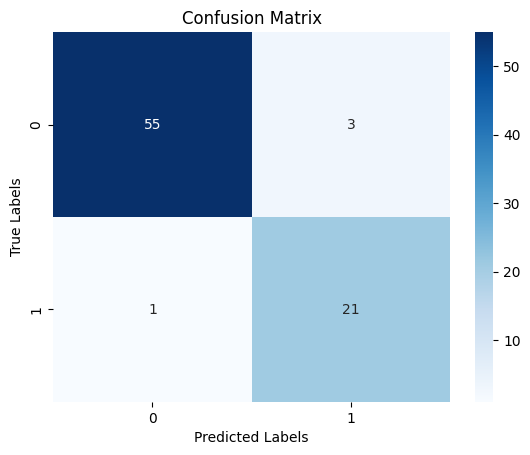

In [15]:
# Import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Display the plot
plt.show()

In [16]:
# Import the accuracy_score function from the scikit-learn library
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model by comparing predicted and actual labels
# y_test contains the true labels, and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.95


In [17]:
# Import the precision_score and recall_score functions from the scikit-learn library
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall scores of the model
# y_test contains the true labels, and y_pred contains the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the precision and recall scores
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.875
Recall: 0.9545454545454546


In [18]:
# Import the f1_score function from the scikit-learn library
from sklearn.metrics import f1_score

# Calculate the F1 score of the model
# y_test contains the true labels, and y_pred contains the predicted labels
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.9130434782608695


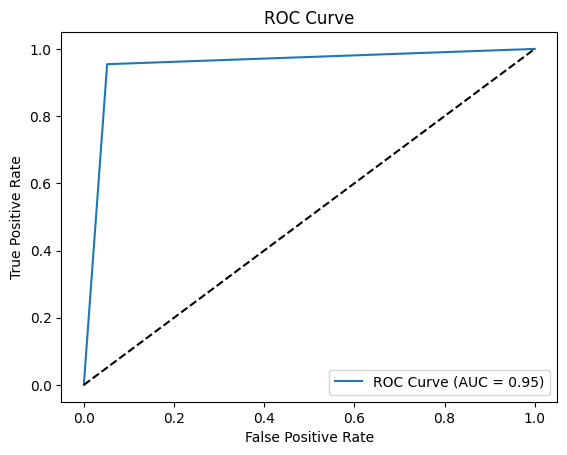

In [19]:
# Import necessary libraries for ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC score
# y_test contains the true labels, and y_pred contains the predicted labels
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random predictions
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Customer Use of the Model with "Unseen Data"**

At this stage, the AI model produced with a certain performance is delivered to the customer.

And the customer gets the outputs by using the model with the new data (Unseen Data) produced. Unseen Data set has inputs but no output!

In [20]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads_New.csv to Social_Network_Ads_New.csv


In [21]:
import io
unseen_dataset_df = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads_New.csv']), delimiter=";", header=0)
unseen_dataset_df

,Age,EstimatedSalary
0,39,42000
1,20,49000
2,35,88000
3,30,62000
4,31,118000
...,...,...
314,46,41000
315,51,23000
316,50,20000
317,36,33000


In [22]:
unseen_dataset = unseen_dataset_df.iloc[:, :].values
unseen_dataset

array([[    39,  42000],
       [    20,  49000],
       [    35,  88000],
       [    30,  62000],
       [    31, 118000],
       [    24,  55000],
       [    28,  85000],
       [    26,  81000],
       [    35,  50000],
       [    22,  81000],
       [    30, 116000],
       [    26,  15000],
       [    29,  28000],
       [    29,  83000],
       [    35,  44000],
       [    35,  25000],
       [    28, 123000],
       [    35,  73000],
       [    28,  37000],
       [    27,  88000],
       [    28,  59000],
       [    32,  86000],
       [    33, 149000],
       [    19,  21000],
       [    21,  72000],
       [    26,  35000],
       [    27,  89000],
       [    26,  86000],
       [    38,  80000],
       [    39,  71000],
       [    37,  71000],
       [    38,  61000],
       [    37,  55000],
       [    42,  80000],
       [    40,  57000],
       [    35,  75000],
       [    36,  52000],
       [    40,  59000],
       [    41,  59000],
       [    36,  75000],


In [23]:
unseen_dataset = sc.transform(unseen_dataset)

In [24]:
y_pred_unseen = classifier.predict(unseen_dataset)
y_pred_unseen

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [25]:
y_pred_unseen_df = pd.DataFrame(y_pred_unseen, columns=["Predicted_Output"])
y_pred_unseen_df.head(10)

,Predicted_Output
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [26]:
all_df = unseen_dataset_df.merge(y_pred_unseen_df, how="left", left_index=True, right_index=True)
all_df

,Age,EstimatedSalary,Predicted_Output
0,39,42000,0
1,20,49000,0
2,35,88000,0
3,30,62000,0
4,31,118000,1
...,...,...,...
314,46,41000,1
315,51,23000,1
316,50,20000,1
317,36,33000,0
